### random sample imputation

aim: random sample imputation consists of taking random observation from the datesets and we use this observation to replace the nan values

when should it is used? it assume that the data are missing competely at random

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [2]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
median=df['Age'].median()

In [5]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    #it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the datasets
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [8]:
impute_nan(df,'Age',median)

In [9]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [10]:
#df.drop('Age',axis=1,inplace=True)

In [11]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [12]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [13]:
import matplotlib.pyplot as plt

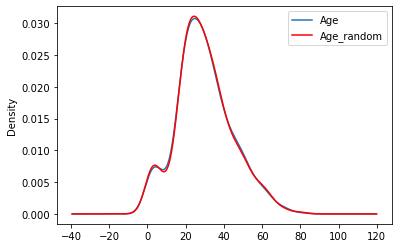

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### capturing NaN values with a new feature

In [15]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df['Age_null']=np.where(df['Age'].isnull(),1,0)

In [17]:
df.head()

,Survived,Age,Fare,Age_null
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [18]:
df['Age'].median()

28.0

In [19]:
df['Age'].fillna(28,inplace=True)

In [20]:
df.head(40)

,Survived,Age,Fare,Age_null
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### End of distribution imputation

In [21]:
import numpy as mp
import pandas as pd


df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

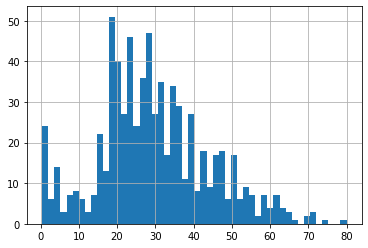

In [22]:
df.Age.hist(bins=50)

In [23]:
extrem=df.Age.mean()+3*df.Age.std()
extrem

73.27860964406095

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

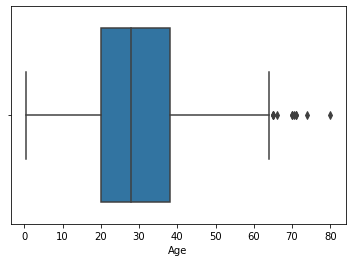

In [24]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [25]:
#df['Age'].fillna(df.Age.mean()+3*df.Age.std(),inplace=True)

In [26]:
#df.isnull().sum()

In [27]:
def Age_impute(df,variable,median,extrem):
    df[variable+'_end_distribution']=df[variable].fillna(extrem)
    df[variable].fillna(median,inplace=True)
    

In [28]:
Age_impute(df,'Age',df.Age.median(),extrem)

In [29]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

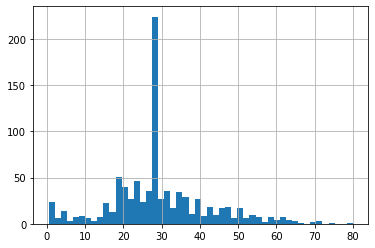

In [30]:
df.Age.hist(bins=50)

<AxesSubplot:>

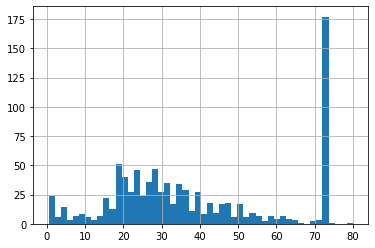

In [31]:
df.Age_end_distribution.hist(bins=50)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

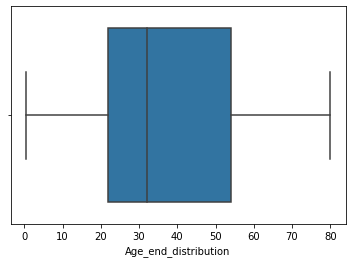

In [33]:
sns.boxplot('Age_end_distribution',data=df)